<a href="https://colab.research.google.com/github/lauranenart/deep-learning-first/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install d2l==0.17.2

     |████████████████████████████████| 82 kB 582 kB/s 
     |████████████████████████████████| 20.1 MB 62.9 MB/s 
     |████████████████████████████████| 11.6 MB 41.4 MB/s 
     |████████████████████████████████| 9.9 MB 36.2 MB/s 
     |████████████████████████████████| 61 kB 7.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the 

In [3]:
!pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 3.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
d2l 0.17.2 requires matplotlib==3.3.3, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
import numpy as np

d2l.use_svg_display()

In [155]:
transform_train = transforms.Compose([
      transforms.ColorJitter(brightness=0.2, contrast=0.2),
      transforms.RandomRotation(degrees=20, interpolation=PIL.Image.BILINEAR),
      transforms.RandomHorizontalFlip(p=0.5),
      transforms.RandomPerspective(distortion_scale=0.3, p=0.3),
      transforms.ToTensor(),
      transforms.Normalize(mean=(0.485,), std=(0.229,))
  ])
transform_valid = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=(0.485,), std=(0.229,))
  ])
transform_examples = transforms.Compose([
      transforms.Resize((28,28)),                              
      transforms.Grayscale(),
      transforms.ToTensor()
  ])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1256: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [130]:
train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=transform_train, download=True)
valid = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=transform_valid, download=True)

In [132]:
valid, test = torch.utils.data.random_split(valid, [int(0.9 *    len(valid)), int(0.1 * len(valid))])

In [196]:
len(train), len(valid)

(60000, 9000)

In [197]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [198]:
def showImage(img):
  im = img.permute(1, 2, 0)
  plt.imshow(im.squeeze(), cmap="gray")

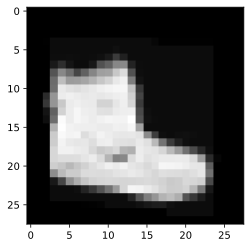

In [187]:
showImage(train[0][0])

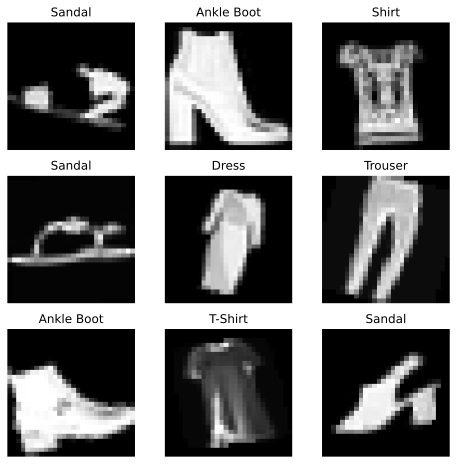

In [113]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train), size=(1,)).item()
    img, label = train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    im = img.permute(1, 2, 0)
    plt.axis("off")
    plt.imshow(im.squeeze(), cmap="gray")
plt.show()

In [ ]:
def findMaxWorkers(numWorkers, batches, passedDataset):

  device = "cuda" if torch.cuda.is_available() else "cpu"
  kwargs = {'num_workers': numWorkers, 'pin_memory': True} if device=='cuda' else {}

  loader = data.DataLoader(passedDataset, batch_size = int(batches), shuffle=True,
                            **kwargs)
  timer = d2l.Timer()

  for batch_idx, (images, labels) in enumerate(loader, 0):
    continue

  return timer.stop() 

In [ ]:
npWorkers = np.array([0,1,2,4,16,32,64,128])
npBatches = np.array([32, 64, 128, 256, 512, 1024])
maxTimer = float('inf')

for batches in  npBatches:
  for workers in npWorkers:
    timer = findMaxWorkers(workers, batches, valid)
    if maxTimer and timer < maxTimer:
      maxTimer = timer
      maxBatches = batches
      maxWorkers = workers

print("minimum time was " + f'{maxTimer:.2f} sec')
print("with workers: " + str(maxWorkers) + " and batches: " + str(maxBatches))

In [134]:
device = "cuda" if torch.cuda.is_available() else "cpu"
train_kwargs = {'num_workers': 4, 'pin_memory': True} if device=='cuda' else {}
valid_kwargs = {'num_workers': 2, 'pin_memory': True} if device=='cuda' else {}
print("We are using " + device)

We are using cuda


In [135]:
train_batch_size = 1024
valid_batch_size = 512
test_batch_size = 32

train_loader = data.DataLoader(train, train_batch_size, shuffle=True,
                             **train_kwargs)
valid_loader = data.DataLoader(valid, valid_batch_size, shuffle=True,
                             **valid_kwargs)
test_loader = data.DataLoader(test, test_batch_size, shuffle=True,
                             **valid_kwargs)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [117]:
import torch.nn.functional as F
import torch.optim as optim

In [192]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # define layers
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1, stride=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1)

    self.batch_norm1 = nn.BatchNorm2d(num_features = 32)
    self.batch_norm2 = nn.BatchNorm2d(num_features = 64)

    self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(in_features=64*7*7, out_features=128)
    self.fc2 = nn.Linear(in_features=128, out_features=64) #fully connect
    self.dropout = nn.Dropout(p=0.3)
    self.out = nn.Linear(in_features=64, out_features=10)

  def forward(self, t):
    # conv1
    t = self.conv1(t)
    t = F.relu(t)
    t = self.batch_norm1(t)
    t = self.max_pool2d(t)

    # conv2
    t = self.conv2(t)
    t = F.relu(t)
    t = self.batch_norm2(t)
    t = self.max_pool2d(t)

    # fc1
    t = torch.flatten(t, 1) #flatten tensor to be passed to dense layer
    t = self.fc1(t)
    t = F.relu(t)

    # fc2
    t = self.fc2(t)
    t = F.relu(t)
    t = self.dropout(t)
    
    # output
    t = self.out(t)

    return t

In [193]:
model = Network()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [194]:
model = model.to(device)

H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}

trainSteps = len(train_loader.dataset) // train_batch_size
valSteps = len(valid_loader.dataset) // valid_batch_size

In [195]:
epochs = 20

timer = d2l.Timer()

for e in range(0, epochs):
  model.train()

  totalTrainLoss = 0
  totalValLoss = 0
  trainCorrect = 0
  valCorrect = 0
  
  for batch_idx, (images, labels) in enumerate(train_loader, 0):
    (images, labels) = (images.to(device, non_blocking=True), labels.to(device, non_blocking=True))
    
    pred = model(images)
    loss = criterion(pred, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    totalTrainLoss += loss
    trainCorrect += (pred.argmax(1) == labels).type(torch.float).sum().item()

    torch.cuda.empty_cache()
    
  with torch.no_grad():
    model.eval()

    for batch_idx, (images, labels) in enumerate(valid_loader, 0):
      (images, labels) = (images.to(device, non_blocking=True), labels.to(device, non_blocking=True))

      pred = model(images)
      totalValLoss += criterion(pred, labels)

      valCorrect += (pred.argmax(1) == labels).type(torch.float).sum().item()

      torch.cuda.empty_cache()
    
  avgTrainLoss = totalTrainLoss / trainSteps
  avgValLoss = totalValLoss / valSteps
  trainCorrect = trainCorrect / len(train_loader.dataset)
  valCorrect = valCorrect / len(valid_loader.dataset)

  
  H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
  H["train_acc"].append(trainCorrect)
  H["val_loss"].append(avgValLoss.cpu().detach().numpy())
  H["val_acc"].append(valCorrect)

  print("[INFO] EPOCH: {}/{}".format(e + 1, epochs))
  print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
    avgTrainLoss, trainCorrect))
  print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
    avgValLoss, valCorrect))

f'{timer.stop():.2f} sec'   

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[INFO] EPOCH: 1/20
Train loss: 0.847048, Train accuracy: 0.6959
Val loss: 0.509260, Val accuracy: 0.8213

[INFO] EPOCH: 2/20
Train loss: 0.513132, Train accuracy: 0.8156
Val loss: 0.409231, Val accuracy: 0.8597

[INFO] EPOCH: 3/20
Train loss: 0.443596, Train accuracy: 0.8422
Val loss: 0.374986, Val accuracy: 0.8704

[INFO] EPOCH: 4/20
Train loss: 0.403536, Train accuracy: 0.8556
Val loss: 0.347442, Val accuracy: 0.8830

[INFO] EPOCH: 5/20
Train loss: 0.380947, Train accuracy: 0.8642
Val loss: 0.338773, Val accuracy: 0.8842

[INFO] EPOCH: 6/20
Train loss: 0.361004, Train accuracy: 0.8719
Val loss: 0.335682, Val accuracy: 0.8818

[INFO] EPOCH: 7/20
Train loss: 0.343861, Train accuracy: 0.8770
Val loss: 0.312298, Val accuracy: 0.8906

[INFO] EPOCH: 8/20
Train loss: 0.327439, Train accuracy: 0.8830
Val loss: 0.308643, Val accuracy: 0.8944

[INFO] EPOCH: 9/20
Train loss: 0.318805, Train accuracy: 0.8882
Val loss: 0.305451, Val accuracy: 0.8928

[INFO] EPOCH: 10/20
Train loss: 0.311789, Trai

'771.91 sec'

In [144]:
torch.save(model, 'model.pt')

In [145]:
model = torch.load('model.pt')
model.eval()

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [146]:
def predict_image(img, model):
    xb = img.unsqueeze(0).to(device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label is: Sneaker , Predicted: Sneaker


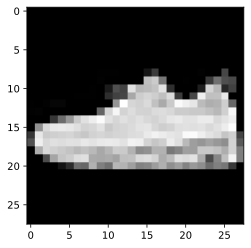

In [147]:
img, label = test[3]
plt.imshow(img[0], cmap='gray')
print("Label is: " + labels_map[label], ', Predicted:', labels_map[predict_image(img, model)])

Label is: Bag , Predicted: Bag


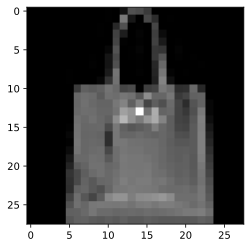

In [148]:
img, label = test[600]
plt.imshow(img[0], cmap='gray')
print("Label is: " + labels_map[label], ', Predicted:', labels_map[predict_image(img, model)])

Label is: T-Shirt , Predicted: T-Shirt


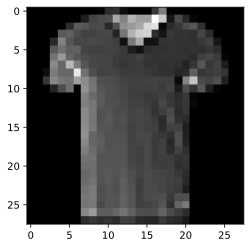

In [149]:
img, label = test[200]
plt.imshow(img[0], cmap='gray')
print("Label is: " + labels_map[label], ', Predicted:', labels_map[predict_image(img, model)])

In [ ]:
!rm -R /root/images/.ipynb_checkpoints
!ls root/images/ -a  

In [170]:
examples = torchvision.datasets.ImageFolder(root='/root/images', transform=transform_examples)

In [158]:
examples[0][0].shape

torch.Size([1, 28, 28])

, Predicted: Bag


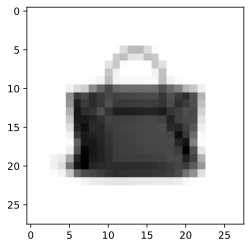

In [171]:
img = examples[1][0]
plt.imshow(img[0], cmap='gray')
print(', Predicted:', labels_map[predict_image(img, model)])

, Predicted: Bag


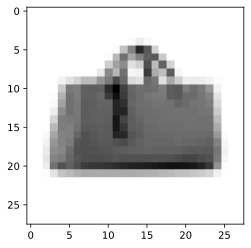

In [179]:
img = examples[5][0]
plt.imshow(img[0], cmap='gray')
print(', Predicted:', labels_map[predict_image(img, model)])